In [ ]:
%load_ext autoreload
%autoreload 2

### Import Dependencies

In [2]:
import pandas as pd
import numpy as np

### Import Raw Dataset

In [3]:
# Read dataset
raw_dataset = pd.read_csv('../data/raw/raw_dataset.csv')

In [4]:
raw_dataset.head(5)

,SMS_id,SMS
0,1,"\tGo until jurong point, crazy.. Available on..."
1,2,\tOk lar... Joking wif u oni...\n
2,3,\tFree entry in 2 a wkly comp to win FA Cup f...
3,4,\tU dun say so early hor... U c already then ...
4,5,"\tNah I don't think he goes to usf, he lives ..."


In [5]:
# Get dataset info
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
SMS_id    5574 non-null int64
SMS       5574 non-null object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
# Normalize column names
raw_dataset = raw_dataset.rename(columns={"SMS_id": "id","SMS":"sms"})

In [7]:
raw_dataset.head(3)

,id,sms
0,1,"\tGo until jurong point, crazy.. Available on..."
1,2,\tOk lar... Joking wif u oni...\n
2,3,\tFree entry in 2 a wkly comp to win FA Cup f...


In [8]:
# Drop unwanted columns
raw_dataset = raw_dataset.drop(['id'],axis=1,inplace=False)
raw_dataset.head(5)

,sms
0,"\tGo until jurong point, crazy.. Available on..."
1,\tOk lar... Joking wif u oni...\n
2,\tFree entry in 2 a wkly comp to win FA Cup f...
3,\tU dun say so early hor... U c already then ...
4,"\tNah I don't think he goes to usf, he lives ..."


Now we have a dataframe of raw dataset which we can use for preprocesing.
* We will use a sample from this dataframe for testing dataprocessing and feature extraction and then we will use the full dataframe for final results.

### Create a Test Dataframe

In [9]:
# We use this dataframe for testing
test_df = raw_dataset[:20]
print(test_df['sms'])

0      \tGo until jurong point, crazy.. Available on...
1                     \tOk lar... Joking wif u oni...\n
2      \tFree entry in 2 a wkly comp to win FA Cup f...
3      \tU dun say so early hor... U c already then ...
4      \tNah I don't think he goes to usf, he lives ...
5      \tFreeMsg Hey there darling it's been 3 week'...
6      \tEven my brother is not like to speak with m...
7      \tAs per your request 'Melle Melle (Oru Minna...
8      \tWINNER!! As a valued network customer you h...
9      \tHad your mobile 11 months or more? U R enti...
10     \tI'm gonna be home soon and i don't want to ...
11     \tSIX chances to win CASH! From 100 to 20,000...
12     \tURGENT! You have won a 1 week FREE membersh...
13     \tI've been searching for the right words to ...
14              \tI HAVE A DATE ON SUNDAY WITH WILL!!\n
15     \tXXXMobileMovieClub: To use your credit, cli...
16                       \tOh k...i'm watching here:)\n
17     \tEh u remember how 2 spell his name... Y

### Data Preprocessing

* Removing unnecessary punctuation, tags
* Removing stop words — frequent words such as ”the”, ”is”, etc. that do not have specific semantic
* Tokenization — convert sentences to words
* Stemming — words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.
* Lemmatization — Another approach to remove inflection by determining the part of speech and utilizing detailed database of the language.

#### Clean/Normalize words

#### Test preprocessing

In [10]:
from src.functions import preprocessor
test_cleaned_dataset = test_df['sms'].apply(preprocessor.preprocess).to_frame()  #preprocess will return tokenized text after cleaning 

[nltk_data] Downloading package punkt to /Users/emmanuvel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/emmanuvel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmanuvel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
test_tokenized_dataset = test_cleaned_dataset['sms'].apply(preprocessor.get_tokenized_text).to_frame()  #preprocess will return tokenized text after cleaning 
print(test_tokenized_dataset)

                                                  sms
0   [jurong, point, crazy, available, bugis, great...
1                             [lar, joking, wif, oni]
2   [free, entry, wkly, comp, win, cup, final, tkt...
3                [dun, say, early, hor, already, say]
4      [nah, think, goes, usf, lives, around, though]
5   [freemsg, hey, darling, weeks, word, back, lik...
6   [even, brother, like, speak, treat, like, aids...
7   [per, request, melle, melle, oru, minnaminungi...
8   [winner, valued, network, customer, selected, ...
9   [mobile, months, entitled, update, latest, col...
10  [going, home, soon, want, talk, stuff, anymore...
11  [six, chances, win, cash, pounds, txt, csh, se...
12  [urgent, week, free, membership, prize, jackpo...
13  [ive, searching, right, words, thank, breather...
14                                     [date, sunday]
15  [xxxmobilemovieclub, use, credit, click, wap, ...
16                                    [kim, watching]
17   [remember, spell, name,

#### Final Preprocessing

In [14]:
cleaned_dataset = raw_dataset['sms'].apply(preprocessor.preprocess).to_frame()  #preprocess will return tokenized text after cleaning 
tokenized_dataset = cleaned_dataset['sms'].apply(preprocessor.get_tokenized_text).to_frame() 

### Feature Extraction

* The mapping of textual data to real valued vectors is called feature extraction.
* One of the simplest techniques to numerically represent text is BAG OF WORDS (BOW).
* We make the list of unique words in the text corpus called vocabulary. Then we can represent each sentence or    document as a vector with each word represented as 1 for present and 0 for absent from the vocabulary

#### Test Feature Extraction

In [15]:
# Generate Vocabulary
from src.functions import feature_extractor
test_vocabulary, test_vectorized_list = feature_extractor.get_vocabulary(test_tokenized_dataset['sms']) # get_vocabualry() will return a dict of vocabulary available across whole dataset

In [16]:
print(test_vocabulary)

{'jurong': 0, 'point': 1, 'crazy': 2, 'available': 3, 'bugis': 4, 'great': 5, 'world': 6, 'buffet': 7, 'cine': 8, 'got': 9, 'amore': 10, 'wat': 11, 'lar': 12, 'joking': 13, 'wif': 14, 'oni': 15, 'free': 16, 'entry': 17, 'wkly': 18, 'comp': 19, 'win': 20, 'cup': 21, 'final': 22, 'tkts': 23, 'may': 24, 'text': 25, 'receive': 26, 'questionstd': 27, 'txt': 28, 'ratetcs': 29, 'apply': 30, 'overs': 31, 'dun': 32, 'say': 33, 'early': 34, 'hor': 35, 'already': 36, 'nah': 37, 'think': 38, 'goes': 39, 'usf': 40, 'lives': 41, 'around': 42, 'though': 43, 'freemsg': 44, 'hey': 45, 'darling': 46, 'weeks': 47, 'word': 48, 'back': 49, 'like': 50, 'fun': 51, 'still': 52, 'xxx': 53, 'std': 54, 'chgs': 55, 'send': 56, 'rcv': 57, 'even': 58, 'brother': 59, 'speak': 60, 'treat': 61, 'aids': 62, 'patent': 63, 'per': 64, 'request': 65, 'melle': 66, 'oru': 67, 'minnaminunginte': 68, 'nurungu': 69, 'vettam': 70, 'set': 71, 'callertune': 72, 'callers': 73, 'press': 74, 'copy': 75, 'friends': 76, 'winner': 77, '

In [17]:
print(test_vectorized_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 17, 27, 28, 29, 30, 31], [32, 33, 34, 35, 36, 33], [37, 38, 39, 40, 41, 42, 43], [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57], [58, 59, 50, 60, 61, 50, 62, 63], [64, 65, 66, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 72], [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 85, 87, 88, 89], [90, 91, 92, 93, 94, 95, 96, 97, 16, 86, 90, 93, 16], [98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109], [110, 111, 20, 112, 113, 28, 114, 56, 115, 116, 117, 118, 30, 119, 120], [121, 122, 16, 123, 83, 124, 28, 48, 85, 125, 126, 127, 128], [106, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 134, 139, 140, 141], [142, 143], [144, 145, 146, 147, 148, 149, 150, 28, 151, 147, 148, 152], [153, 154], [155, 156, 157, 158, 159, 160, 161], [162, 163, 164, 163, 165], [166, 167, 168, 169, 170, 28, 171, 172, 166, 173, 174, 175, 176]]


In [18]:
# Get frequency of each word in the vocabulary for feature engineering
test_frequency_distribution = feature_extractor.get_word_frequency(test_vectorized_list)

Calculate frequencies of each word in the vocabulary...
Finished calculating frequency distribution...


In [19]:
print(test_frequency_distribution)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 4, 17: 2, 18: 1, 19: 1, 20: 2, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 5, 29: 1, 30: 2, 31: 1, 32: 1, 33: 2, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 2, 49: 1, 50: 3, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 2, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 2, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 2, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 2, 84: 1, 85: 3, 86: 2, 87: 1, 88: 1, 89: 1, 90: 2, 91: 1, 92: 1, 93: 2, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 2, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 2, 135: 1, 136: 1, 137: 1, 138: 

In [20]:
# Retrieve top words in the vocabulary (threshold_value is used for band pass filtering, ie to remove low frequency words)
test_threshold_value = 0
test_top_words=feature_extractor.get_top_words(test_frequency_distribution, test_threshold_value) # get_top_words returns a dict top words with key-> new index, value -> index of word in the vocabulary
print(test_top_words)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 121: 121,

In [21]:
# Create a dic of top words and their frequency distribution to visualize using wordcloud
test_word_freq = {}
for value in test_top_words.values():
    key = feature_extractor.get_key(test_vocabulary,value)
    test_word_freq[key] = test_frequency_distribution[value]
print(test_word_freq)    

{'jurong': 1, 'point': 1, 'crazy': 1, 'available': 1, 'bugis': 1, 'great': 1, 'world': 1, 'buffet': 1, 'cine': 1, 'got': 1, 'amore': 1, 'wat': 1, 'lar': 1, 'joking': 1, 'wif': 1, 'oni': 1, 'free': 4, 'entry': 2, 'wkly': 1, 'comp': 1, 'win': 2, 'cup': 1, 'final': 1, 'tkts': 1, 'may': 1, 'text': 1, 'receive': 1, 'questionstd': 1, 'txt': 5, 'ratetcs': 1, 'apply': 2, 'overs': 1, 'dun': 1, 'say': 2, 'early': 1, 'hor': 1, 'already': 1, 'nah': 1, 'think': 1, 'goes': 1, 'usf': 1, 'lives': 1, 'around': 1, 'though': 1, 'freemsg': 1, 'hey': 1, 'darling': 1, 'weeks': 1, 'word': 2, 'back': 1, 'like': 3, 'fun': 1, 'still': 1, 'xxx': 1, 'std': 1, 'chgs': 1, 'send': 2, 'rcv': 1, 'even': 1, 'brother': 1, 'speak': 1, 'treat': 1, 'aids': 1, 'patent': 1, 'per': 1, 'request': 1, 'melle': 2, 'oru': 1, 'minnaminunginte': 1, 'nurungu': 1, 'vettam': 1, 'set': 1, 'callertune': 2, 'callers': 1, 'press': 1, 'copy': 1, 'friends': 1, 'winner': 1, 'valued': 1, 'network': 1, 'customer': 1, 'selected': 1, 'receivea': 

#### Final Feature Extraction

In [22]:
# Generate Vocabulary
vocabulary, vectorized_list = feature_extractor.get_vocabulary(tokenized_dataset['sms']) # get_vocabulary() will return a dict of vocabulary available across whole dataset
frequency_distribution = feature_extractor.get_word_frequency(vectorized_list)
threshold_value = 12
top_words=feature_extractor.get_top_words(frequency_distribution, threshold_value) # get_top_words returns a dict top words with key-> new index, value -> index of word in the vocabulary
# Create a dic of top words and their frequency distribution to visualize using wordcloud
word_freq = {}
for value in top_words.values():
    key = feature_extractor.get_key(vocabulary,value)
    word_freq[key] = frequency_distribution[value]

Calculate frequencies of each word in the vocabulary...
Finished calculating frequency distribution...


### Generate Word Cloud of Top Words for Analysis

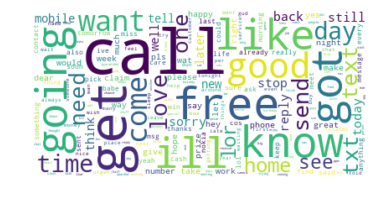

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
# Save file to reports
wordcloud.to_file("../reports/figures/word_count.png")

In [26]:
# Top 10 words
dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])

{'call': 581,
 'get': 390,
 'free': 278,
 'know': 257,
 'got': 252,
 'going': 251,
 'ill': 243,
 'like': 242,
 'good': 236,
 'want': 231}

In [27]:
# Sort word frequency dictionary for analysis
sorted_d = sorted(word_freq.items(), key=lambda x: x[1])
print(sorted_d)

[('point', 13), ('press', 13), ('valued', 13), ('almost', 13), ('etc', 13), ('cut', 13), ('hee', 13), ('download', 13), ('mah', 13), ('felt', 13), ('invited', 13), ('caller', 13), ('numbers', 13), ('quiz', 13), ('msgs', 13), ('march', 13), ('optout', 13), ('side', 13), ('secret', 13), ('tel', 13), ('dnt', 13), ('fone', 13), ('bslvyl', 13), ('lost', 13), ('reading', 13), ('txts', 13), ('currently', 13), ('motorola', 13), ('talking', 13), ('couple', 13), ('ass', 13), ('savamob', 13), ('within', 13), ('fast', 13), ('yar', 13), ('happiness', 13), ('area', 13), ('opt', 13), ('sex', 13), ('mayb', 13), ('wats', 13), ('yrs', 13), ('knew', 13), ('least', 13), ('earlier', 13), ('luck', 13), ('chennai', 13), ('enter', 13), ('gas', 13), ('wkly', 14), ('credit', 14), ('hungry', 14), ('decided', 14), ('seeing', 14), ('telling', 14), ('whole', 14), ('friday', 14), ('player', 14), ('fancy', 14), ('bank', 14), ('log', 14), ('course', 14), ('darlin', 14), ('goodmorning', 14), ('thinks', 14), ('case', 14

### Create Feature Vector (Encoding words into numerical vectors)

In [44]:
# Now we have a vocabulary of all words and a top words in the entire dataset
# And we need to obtain a feature vector by encoding these words into numerical vectors

* Techniques for Encoding - All the popular techniques that are used for encoding.
    * Binary Bag of Words
    * Bigram, Ngram
    * TF-IDF( Term Frequency - Inverse Document Frequency)

* Binary Bag of Words Model — 
    * Find the unique words i.e., vocabulary from the list of documents. 
    * Parse each document word with the vocabulary, if present ‘1’ else ‘0’. 
    * This makes each document vector maintain the same length that of vocabulary length.
    * We use this vocabulary for the new document vectorization.

#### Binary Bag of Words Model


In binary BoW, we dont count the frequency of word, we just place 1 if the word appears in the review or else 0. In CountVectorizer there is a parameter binary = true this makes our BoW to binary BoW.

##### Using custom function

In [45]:
# Get frequency of each word in the vocabulary for feature engineering
from src.functions import feature_vector
#print({k: vocabulary[k] for k in list(vocabulary)[:500]})
binary_bow = feature_vector.custom_binary_bow_vector(vocabulary,tokenized_dataset['sms'])

In [46]:
print(tokenized_dataset['sms'][0])
print(binary_bow[0])

['jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'buffet', 'cine', 'got', 'amore', 'wat']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

##### Using CountVectorizer (scikit-learn)


In [47]:
binary_count_vectorizer_vector = feature_vector.binary_count_vectorizer(preprocessor.preprocess,cleaned_dataset['sms'])

In [48]:
print(binary_count_vectorizer_vector)

  (0, 250)	1
  (0, 491)	1
  (0, 950)	1
  (0, 952)	1
  (0, 1282)	1
  (0, 1568)	1
  (0, 2872)	1
  (0, 2927)	1
  (0, 2966)	1
  (0, 3468)	1
  (0, 3753)	1
  (0, 3909)	1
  (0, 5100)	1
  (0, 5521)	1
  (0, 7386)	1
  (0, 7820)	1
  (0, 8072)	1
  (0, 8319)	1
  (1, 3721)	1
  (1, 3945)	1
  (1, 5060)	1
  (1, 5094)	1
  (1, 8208)	1
  (1, 8469)	1
  (2, 342)	1
  :	:
  (5572, 988)	1
  (5572, 1867)	1
  (5572, 2178)	1
  (5572, 2605)	1
  (5572, 2656)	1
  (5572, 2782)	1
  (5572, 3031)	1
  (5572, 3121)	1
  (5572, 3408)	1
  (5572, 3468)	1
  (5572, 3546)	1
  (5572, 3604)	1
  (5572, 4066)	1
  (5572, 4849)	1
  (5572, 6729)	1
  (5572, 6738)	1
  (5572, 7364)	1
  (5572, 7513)	1
  (5572, 7863)	1
  (5572, 8125)	1
  (5573, 3624)	2
  (5573, 4761)	1
  (5573, 6151)	1
  (5573, 7513)	1
  (5573, 7661)	1


* Drawbacks of BoW/ Binary BoW

Our main objective in doing these text to vector encodings is that similar meaning text vectors should be close to each other, but in some cases this may not possible for Bow

For example, if we consider two reviews This pasta is very tasty and This pasta is not tasty after stopwords removal both sentences will be converted to pasta tasty so both giving exact same meaning.

The main problem is here we are not considering the front and back words related to every word, here comes Bigram and Ngram techniques.

#### BI-GRAM BOW

Considering pair of words for creating dictionary is Bi-Gram , Tri-Gram means three consecutive words so as NGram.

CountVectorizer has a parameter ngram_range if assigned to (1,2) it considers Bi-Gram BoW

But this massively increases our dictionary size

In [49]:
bigram_count_vectorizer_vector = feature_vector.bigram_count_vectorizer(preprocessor.preprocess,cleaned_dataset['sms'])

#### Word Frequencies with TfidfVectorizer (scikit-learn) 

TF-IDF

Term Frequency - Inverse Document Frequency it makes sure that less importance is given to most frequent words and also considers less frequent words.

Term Frequency is number of times a particular word(W) occurs in a review divided by totall number of words (Wr) in review. The term frequency value ranges from 0 to 1.

Inverse Document Frequency is calculated as log(Total Number of Docs(N) / Number of Docs which contains particular word(n)). Here Docs referred as Reviews.

TF-IDF is TF * IDF that is (W/Wr)*LOG(N/n)

Using scikit-learn's tfidfVectorizer we can get the TF-IDF.

In [50]:
tfidf_vector = feature_vector.tfidf_vectorizer(preprocessor.preprocess,cleaned_dataset['sms'])

Tf-idf is the best vectorization method among these three, because it prioritise the words in each document. IDF value for the word “this” is less since it present in both the documents. So, unlike word counts which give higher value for stop words like “in”, “this”, word frequency lowers the value if it present in more number of documents, because stop words repeats in each document almost.

* Limitaions of TFIDF:

So even here we get a TF-IDF value for every word and in some cases it may consider different meaning reviews as similar after stopwords removal. so to over come we can use BI-Gram or NGram.

#### Using CountVectorizer for Feature Extraction 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=preprocessor.preprocess)
bow_transformer.fit(sms_df)

In [ ]:
# Now we have a vocabulary of all words and a top words in the entire dataset
# And we need to obtain a feature vector by encoding these words into numerical vectors

* Techniques for Encoding - All the popular techniques that are used for encoding.
    * Bag of Words
    * Binary Bag of Words
    * Bigram, Ngram
    * TF-IDF( Term Frequency - Inverse Document Frequency)
    * Word2Vec
    * Avg-Word2Vec
    * TF-IDF Word2Vec

In [ ]:
len(bow_transformer.get_feature_names())

In [ ]:
message4 = sms_df[3]
print(message4)

In [ ]:
bow4 = bow_transformer.transform([message4])
print(bow4)

In [ ]:
print (bow_transformer.get_feature_names()[6043])
print (bow_transformer.get_feature_names()[2016])
print (bow_transformer.get_feature_names()[2035])

In [ ]:
messages_bow = bow_transformer.transform(sms_df)

In [ ]:
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz /
                             (messages_bow.shape[0] * messages_bow.shape[1])))

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [ ]:
print (messages_tfidf.shape)

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 2
km = KMeans(num_clusters,random_state=99,init='k-means++', n_init=14, max_iter=100, tol=0.00001, copy_x=True)
km.fit(messages_tfidf)
clusters = km.labels_.tolist()
print("Results of Clustering:")
print(clusters)